In [1]:
from matplotlib import pyplot as plt
from util.datasets import * 
import models_mae
from universal_mae_helpers import *
import pickle

if torch.cuda.device_count() > 1:
    
    print("Let's use", torch.cuda.device_count(), "GPUs!")   

Let's use 2 GPUs!


In [2]:
model, _               = load_model(ViT_mode='large', prompt=True)

File ‘mae_visualize_vit_large.pth’ already there; not retrieving.



<All keys matched successfully>
Model loaded.
Model promptified.


In [3]:
state = torch.load("models/oxford-pets/segmentation/large.pth") #"models/maze/path_finding_5x5/large.pth")

model.load_state_dict(state)

<All keys matched successfully>

In [4]:
if torch.cuda.device_count() > 1:
        
    model = torch.nn.DataParallel(model, device_ids=[0,1])

In [5]:
file                   = open("prompts/oxford-pets/finetuned/segmentation/large.p", "rb") #open('prompts/maze/finetuned/path_finding_5x5/large.p', 'rb') 
visual_cue             = pickle.load(file)

In [6]:
data_test              = iter(make_dataset["single_task"](dataset_name="oxford-pets", task="segmentation", batch_size=16, split="test"))
#data_train, data_val   = make_dataset["single_task"](dataset_name="oxford-pets", task="segmentation", batch_size=16, split="trainval")

/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


In [7]:
data_batch             = next(data_test) #next(iter(data_train)) #

In [8]:
visual_cue.shape

torch.Size([1, 224, 112, 3])

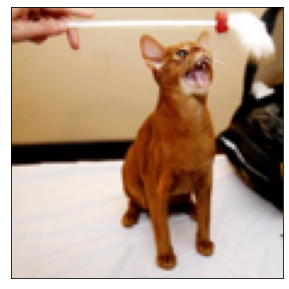

In [9]:
raw_img                = torch.einsum("chw->hwc", data_batch[0][6, :, :, :]) #data_test[50, :, :, :] 

plt.figure(figsize=(5, 5))

fig        = plt.imshow(raw_img)

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [24]:
from skimage.transform import resize

test_img   = stitch_visual_collage(data_batch, visual_cue, 16, "hwc").detach()[4, :, :, :] #torch.cat([raw_img, visual_cue[0, :, :, :]], dim=1).detach() #
test_img   = test_img - imagenet_mean
test_img   = test_img / imagenet_std

MAE with pixel reconstruction:


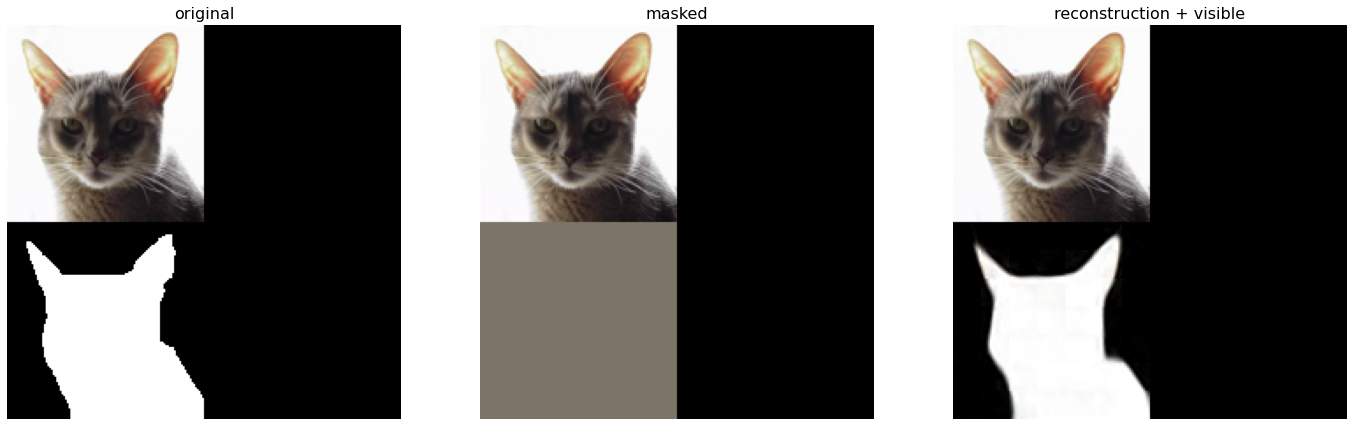

In [25]:
torch.manual_seed(2)

model.cuda()

print('MAE with pixel reconstruction:')
reconstructed_frame = run_one_image(test_img, model)

In [ ]:
# clean up all functions
# AdamW optimizers

# Visualization function
# metrics and post-processing
# Prompt retrieval function
# push new repo

# multi-task

In [1]:
def prompt_reconstruction(self, x, mask_ratio):

    """
        Perform per-sample random masking by per-sample shuffling.
        Per-sample shuffling is done by argsort random noise.
        x: [N, L, D], sequence
    """

    N, L, D     = x.shape  # batch, length, dim
    len_keep    = int(L * (1 - mask_ratio))
    
    noise       = torch.arange(1, L+1).type(torch.int64).view(1, -1).to(config.device) #torch.rand(N, L, device=x.device)  # noise in [0, 1]

    all_ids     = set(list(np.arange(0, L))) 
    ids_remove  = set(list(np.arange(0, L).reshape(config.NUM_PATCHES, config.NUM_PATCHES)[int(config.NUM_PATCHES/2):, :int(config.NUM_PATCHES/2)].reshape(-1,)))
    ids_to_keep = all_ids - ids_remove

    ids_shuffle = torch.Tensor(np.array(list(ids_to_keep) + list(ids_remove))).type(torch.int64).view(1, -1).to(config.device)
    ids_restore = torch.argsort(ids_shuffle, dim=1)
    ids_restore = ids_restore.repeat(N, 1)

    len_keep    = len(list(ids_to_keep))
    ids_keep    = torch.Tensor(np.array(list(ids_to_keep))).type(torch.int64).view(1, -1).to(config.device)

    ids_keep    = ids_keep.repeat(N, 1)

    x_masked    = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))


    # generate the binary mask: 0 is keep, 1 is remove
    mask               = torch.ones([N, L], device=x.device)
    mask[:, :len_keep] = 0

    # unshuffle to get the binary mask
    mask               = torch.gather(mask, dim=1, index=ids_restore)

    return x_masked, mask, ids_restore


def promptify(model):
    
    model.random_masking = types.MethodType(prompted_masking, model)
    
    return model


In [5]:
from util.datasets import * 

In [2]:
data_loader = build_multitask_dataset(["maze", "maze"], task=["path_finding_5x5", "path_finding_10x10"], split="val", batch_size=1)

NameError: name 'build_multitask_dataset' is not defined

In [7]:
valid_loader = data_loader if False else zip(data_loader[0], data_loader[1])

In [ ]:
dummy = 0

for _data in valid_loader:
    
    dummy += 1
    
    print(dummy)

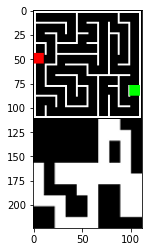

In [13]:
from matplotlib import pyplot as plt

plt.imshow(torch.einsum("chw->hwc", _data[0][0][0, :, :, :]))

In [16]:
_data[1]

tensor([1])